In [24]:
%cd "COVID-19" 
!pwd
#| pwd
#!pwd
!git pull origin master
%cd ".."
!pwd

/home/julsoles/Documents/covid_data_science/data/COVID-19
/home/julsoles/Documents/covid_data_science/data/COVID-19
From https://github.com/CSSEGISandData/COVID-19
 * branch              master     -> FETCH_HEAD
Already up to date.
/home/julsoles/Documents/covid_data_science/data
/home/julsoles/Documents/covid_data_science/data


In [25]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas 
import seaborn as sns
from IPython.display import display
import datetime
#from datetime import datetime
import plotly.express as px


import os
from pathlib import Path

In [26]:
curr_folder = Path(os.getcwd())
print(curr_folder)

/home/julsoles/Documents/covid_data_science/data


In [27]:
data_folder = os.path.join(curr_folder, 'COVID-19', 'csse_covid_19_data', 'csse_covid_19_time_series')

today_date = datetime.date.today()
yesterday = today_date - datetime.timedelta(days=1)
yesterday = yesterday.strftime('%m/%d/%Y')
display(yesterday)

last_seven_days = today_date - datetime.timedelta(days=7)
last_seven_days = last_seven_days.strftime('%m/%d/%Y')
display(last_seven_days)

'05/04/2020'

'04/28/2020'

In [28]:
def new_infection_computer(infection_df):
    
    new_infection_df = infection_df.copy().filter(['Province/State', 'Country/Region', 'Lat', 'Long'])
    list_to_skip = ['Province/State', 'Country/Region', 'Lat', 'Long']
    
    prev = infection_df.loc[:,'1/22/20']
    for (columnName, columnData) in infection_df.iteritems():
        if columnName in list_to_skip:
            continue
        else:
            new_infection_df[columnName] = columnData.subtract(prev, fill_value=0)
            prev = columnData
    
    return new_infection_df

def five_day_moving_average(orig_df):
    
    mv_avg_df = orig_df.copy().filter(['Province/State', 'Country/Region', 'Lat', 'Long'])
    list_to_skip = ['Province/State', 'Country/Region', 'Lat', 'Long']
    
    dates_list = []
    
    for (columnName, columnData) in orig_df.iteritems():
        if columnName in list_to_skip:
            continue
        else:
            dates_list.append(columnData)
            if len(dates_list) == 5:
                mv_avg_df[columnName] = sum(dates_list)/5
                dates_list.pop(0)
            else:
                continue
    
    return mv_avg_df

In [29]:
covid_19_confirmed_orig = pd.read_csv(os.path.join(data_folder, 'time_series_covid19_confirmed_global.csv'))
display(covid_19_confirmed_orig)
covid_19_deaths_orig = pd.read_csv(os.path.join(data_folder, 'time_series_covid19_deaths_global.csv'))
covid_19_recovered_orig = pd.read_csv(os.path.join(data_folder, 'time_series_covid19_recovered_global.csv'))


covid_19_infections_per_day_orig = new_infection_computer(covid_19_confirmed_orig)
#covid_19_confirmed_mv_avg = five_day_moving_average(covid_19_confirmed_orig)
#covid_19_deaths_mv_avg = five_day_moving_average(covid_19_confirmed_orig)
covid_19_infections_mv_avg = five_day_moving_average(covid_19_infections_per_day_orig)

Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.000000  65.000000        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN         Western Sahara  24.215500 -12.885800        0   
262            NaN  Sao Tome and Principe   0.186360   6.613081        0   
263            NaN                  Yemen  15.552727  48.516388        0   
264            NaN                Comoros -11.645500  43.333300        0   
265            NaN             Tajikistan  38.861034  71.276093        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/25/20  4/26/20  \
0          0        0        0        0        0  ...     1463     1531   
1          0        0        0        0        0  ...      712      726   
2          0        0        0        0        0  ...     3256     3382   
3          0        0        0        0        0  ...      738      738   
4          0        0        0        0        0  ...       25       26   
..       ...      ...      ...      ...      ...  ...      ...      ...   
261        0        0        0        0        0  ...        6        6   
262        0        0        0        0        0  ...        4        4   
263        0        0        0        0        0  ...        1        1   
264        0        0        0        0        0  ...        0        0   
265        0        0        0        0        0  ...        0        0   

     4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  5/4/20  
0       1703     1828     1939     2171    2335    2469    2704    2894  
1        736      750      766      773     782     789     795     803  
2       3517     3649     3848     4006    4154    4295    4474    4648  
3        743      743      743      745     745     747     748     750  
4         27       27       27       27      30      35      35      35  
..       ...      ...      ...      ...     ...     ...     ...     ...  
261        6        6        6        6       6       6       6       6  
262        4        8        8       14      16      16      16      23  
263        1        1        6        6       7      10      10      12  
264        0        0        0        1       1       3       3       3  
265        0        0        0       15      15      76     128     230  

[266 rows x 108 columns]

In [30]:
## Preprocessing of world data

covid_19_confirmed_orig.columns = ['Province', 'Country', 'Lat', 'Long'] + pd.to_datetime(covid_19_confirmed_orig.columns[4:]).strftime('%m/%d/%Y').to_list()
covid_19_deaths_orig.columns = ['Province', 'Country', 'Lat', 'Long'] + pd.to_datetime(covid_19_deaths_orig.columns[4:]).strftime('%m/%d/%Y').to_list()
covid_19_recovered_orig.columns = ['Province', 'Country', 'Lat', 'Long'] + pd.to_datetime(covid_19_recovered_orig.columns[4:]).strftime('%m/%d/%Y').to_list()

covid_19_infections_per_day_orig.columns = ['Province', 'Country', 'Lat', 'Long'] + pd.to_datetime(covid_19_infections_per_day_orig.columns[4:]).strftime('%m/%d/%Y').to_list()
covid_19_infections_mv_avg.columns = ['Province', 'Country', 'Lat', 'Long'] + pd.to_datetime(covid_19_infections_mv_avg.columns[4:]).strftime('%m/%d/%Y').to_list()

## World confirmed, deaths, recovered data per country including latitude and longitude
covid_19_confirmed_country = covid_19_confirmed_orig.copy().groupby('Country').sum()
covid_19_deaths_country = covid_19_deaths_orig.copy().groupby('Country').sum()
covid_19_recovered_country = covid_19_recovered_orig.copy().groupby('Country').sum()

covid_19_infections_per_day_orig_country = covid_19_infections_per_day_orig.copy().groupby('Country').sum()
covid_19_infections_mv_avg_country = covid_19_infections_mv_avg.copy().groupby('Country').sum() 

display(covid_19_confirmed_country.head())

## Compiled world confirmed data
covid_19_confirmed = covid_19_confirmed_country.copy().drop(['Lat', 'Long'],axis=1).sum().to_frame().reset_index()
covid_19_confirmed.columns = ['Date', 'World Confirmed']
covid_19_confirmed['Date'] = pd.to_datetime(covid_19_confirmed['Date'])

display(covid_19_confirmed.head())

# World deaths data
covid_19_deaths = covid_19_deaths_country.copy().drop(['Lat', 'Long'], axis=1).sum().to_frame().reset_index()
covid_19_deaths.columns = ['Date', 'World Deaths']
covid_19_deaths['Date'] = pd.to_datetime(covid_19_deaths['Date'])

# World recovered data
covid_19_recovered = covid_19_recovered_country.copy().drop(['Lat', 'Long'], axis=1).sum().to_frame().reset_index()
covid_19_recovered.columns = ['Date', 'World Recovered']
covid_19_recovered['Date'] = pd.to_datetime(covid_19_recovered['Date'])

Lat     Long  01/22/2020  01/23/2020  01/24/2020  01/25/2020  \
Country                                                                         
Afghanistan  33.0000  65.0000           0           0           0           0   
Albania      41.1533  20.1683           0           0           0           0   
Algeria      28.0339   1.6596           0           0           0           0   
Andorra      42.5063   1.5218           0           0           0           0   
Angola      -11.2027  17.8739           0           0           0           0   

             01/26/2020  01/27/2020  01/28/2020  01/29/2020  ...  04/25/2020  \
Country                                                      ...               
Afghanistan           0           0           0           0  ...        1463   
Albania               0           0           0           0  ...         712   
Algeria               0           0           0           0  ...        3256   
Andorra               0           0           0           0  ...         738   
Angola                0           0           0           0  ...          25   

             04/26/2020  04/27/2020  04/28/2020  04/29/2020  04/30/2020  \
Country                                                                   
Afghanistan        1531        1703        1828        1939        2171   
Albania             726         736         750         766         773   
Algeria            3382        3517        3649        3848        4006   
Andorra             738         743         743         743         745   
Angola               26          27          27          27          27   

             05/01/2020  05/02/2020  05/03/2020  05/04/2020  
Country                                                      
Afghanistan        2335        2469        2704        2894  
Albania             782         789         795         803  
Algeria            4154        4295        4474        4648  
Andorra             745         747         748         750  
Angola               30          35          35          35  

[5 rows x 106 columns]

Date  World Confirmed
0 2020-01-22              555
1 2020-01-23              654
2 2020-01-24              941
3 2020-01-25             1434
4 2020-01-26             2118

In [31]:
# World daily data for confirmed, deaths and recovered

world_covid_19_daily = covid_19_confirmed.copy()
world_covid_19_daily['World Deaths'] = covid_19_deaths['World Deaths']
world_covid_19_daily['World Recovered'] = covid_19_recovered['World Recovered']

# World total data for confirmed, deaths and recovered until April 28 2020

world_covid_19_summary = world_covid_19_daily.iloc[-1].to_frame()
world_covid_19_summary.columns = ['World Data']



Date World Confirmed World Deaths World Recovered
World Data 2020-05-04         3583055       251537         1162724

Timestamp('2020-01-22 00:00:00')

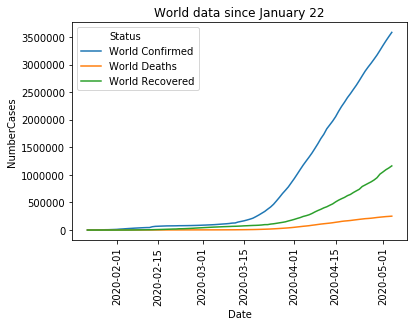

In [32]:
# Graph of daily world confirmed, death and recovered

display(world_covid_19_summary.transpose())

world_covid_19_daily_melt = pd.melt(world_covid_19_daily, id_vars=['Date'], value_vars=['World Confirmed', 'World Deaths', 'World Recovered'], var_name='Status', value_name='NumberCases')

display(world_covid_19_daily_melt['Date'][0])

#fig, axs= plt.subplots(1,2)

ax = sns.lineplot(x= 'Date', y= 'NumberCases', hue='Status', data = world_covid_19_daily_melt)
plt.xticks(rotation='vertical')
plt.title(label='World data since January 22')
plt.show()

world_covid_19_week = world_covid_19_daily_melt[world_covid_19_daily_melt['Date'] >= datetime.datetime.strptime(last_seven_days, '%m/%d/%Y')]


In [33]:
## Transposing dataframe to have countries as columns and dates as rows.
## Second dataframes of each conversion are the first 15 countries with most confirmed, death and recovered cases.

covid_19_confirmed_country_mod = covid_19_confirmed_country.copy().drop(['Lat', 'Long'], axis=1).transpose()
covid_19_confirmed_top_15 = covid_19_confirmed_country_mod.iloc[[-1]].sort_values(by=yesterday,ascending=False, axis=1).iloc[:, :15]

covid_19_deaths_country_mod = covid_19_deaths_country.copy().drop(['Lat', 'Long'], axis=1).transpose()
covid_19_deaths_top_15 = covid_19_deaths_country_mod.iloc[[-1]].sort_values(by=yesterday,ascending=False, axis=1).iloc[:, :15]

covid_19_recovered_country_mod = covid_19_recovered_country.copy().drop(['Lat', 'Long'], axis=1).transpose()
covid_19_recovered_top_15 = covid_19_recovered_country_mod.iloc[[-1]].sort_values(by=yesterday,ascending=False, axis=1).iloc[:, :15]


Country          US   Spain   Italy  United Kingdom  France  Germany  Russia  \
05/04/2020  1180375  218011  211938          191832  169583   166152  145268   

Country     Turkey  Brazil   Iran  China  Canada  Belgium   Peru  India  
05/04/2020  127659  108620  98647  83966   61957    50267  47372  46437

Text(0.5, 1.0, 'Latest confirmed cases - top 15 countries')

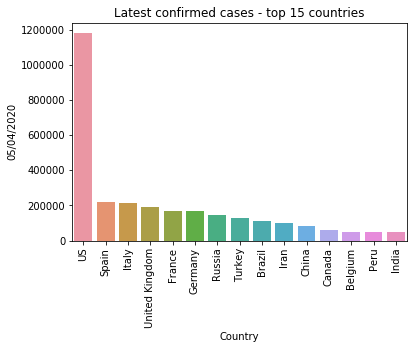

In [34]:
### Show data of the latest confirmed cases for the top 15 countries with most cases.

display(covid_19_confirmed_top_15)
transp_confirmed_top_15_latest = covid_19_confirmed_top_15.transpose()

ax_confirmed = sns.barplot(x = transp_confirmed_top_15_latest.index, y = yesterday, data=transp_confirmed_top_15_latest)
plt.xticks(rotation='vertical')
plt.title(label='Latest confirmed cases - top 15 countries')

Country        US  Italy  United Kingdom  Spain  France  Belgium  Brazil  \
05/04/2020  68922  29079           28809  25428   25204     7924    7367   

Country     Germany  Iran  Netherlands  China  Canada  Turkey  Sweden  Mexico  
05/04/2020     6993  6277         5098   4637    4003    3461    2769    2271

Text(0.5, 1.0, 'Latest death cases - top 15 countries')

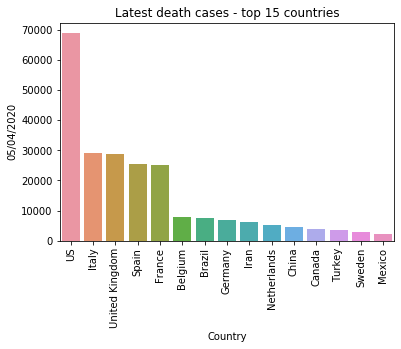

In [35]:
### Show data of the latest confirmed cases for the top 15 countries with most cases.

display(covid_19_deaths_top_15)
transp_deaths_top_15_latest = covid_19_deaths_top_15.transpose()

ax_deaths = sns.barplot(x = transp_deaths_top_15_latest.index, y = yesterday, data=transp_deaths_top_15_latest)
plt.xticks(rotation='vertical')
plt.title(label='Latest death cases - top 15 countries')

Country         US  Germany   Spain  Italy   Iran  China  Turkey  France  \
05/04/2020  187180   132700  121343  82879  79379  78792   68166   51476   

Country     Brazil  Canada  Switzerland  Russia   Peru  Mexico  Ireland  
05/04/2020   45815   26030        25200   18095  14427   13447    13386

Text(0.5, 1.0, 'Latest recovered cases - top 15 countries')

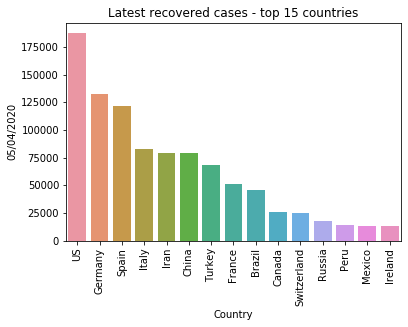

In [36]:
### Show data of the latest confirmed cases for the top 15 countries with most cases.

display(covid_19_recovered_top_15)
transp_recovered_top_15_latest = covid_19_recovered_top_15.transpose()

ax_recovered = sns.barplot(x = transp_recovered_top_15_latest.index, y = yesterday, data=transp_recovered_top_15_latest)
plt.xticks(rotation='vertical')
plt.title(label='Latest recovered cases - top 15 countries')

Country     Brazil   Peru  Ecuador  Mexico  Chile  Colombia  Panama  \
05/04/2020  108620  47372    31881   24905  20643      7973    7197   

Country     Argentina  Bolivia  Honduras  Costa Rica  Guatemala  Uruguay  \
05/04/2020       4887     1681      1178         742        730      657   

Country     Paraguay  Venezuela  Nicaragua  
05/04/2020       415        357         15

Text(0.5, 1.0, 'Confirmed cases in Latin American Cities')

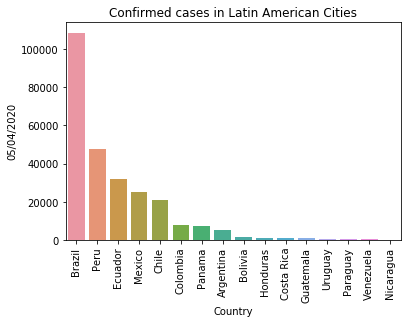

In [37]:
latin_countries = ['Mexico', 'Peru', 'Bolivia', 'Ecuador', 'Colombia', 'Brazil','Argentina', 'Venezuela', 'Chile', 'Panama','Costa Rica', 'Uruguay', 'Paraguay', 'Honduras', 'Nicaragua', 'Guatemala']
confirmed_covid_19_latest_LA = covid_19_confirmed_country_mod.iloc[[-1]].loc[:,latin_countries].sort_values(by=yesterday,ascending=False, axis=1)
display(confirmed_covid_19_latest_LA)
confirmed_transp_LA = confirmed_covid_19_latest_LA.transpose()

ax_recovered = sns.barplot(x = confirmed_transp_LA.index, y=yesterday, data=confirmed_transp_LA)
plt.xticks(rotation='vertical')
plt.title(label='Confirmed cases in Latin American Cities')

Country     Brazil  Mexico  Ecuador  Peru  Colombia  Chile  Argentina  Panama  \
05/04/2020    7367    2271     1569  1344       358    270        260     200   

Country     Honduras  Bolivia  Guatemala  Uruguay  Venezuela  Paraguay  \
05/04/2020        83       82         19       17         10        10   

Country     Costa Rica  Nicaragua  
05/04/2020           6          5

Text(0.5, 1.0, 'Deaths in Latin American Cities')

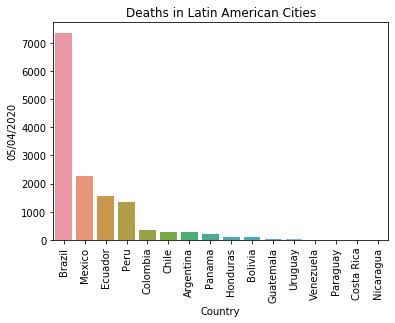

In [38]:
deaths_covid_19_latest_LA = covid_19_deaths_country_mod.iloc[[-1]].loc[:,latin_countries].sort_values(by=yesterday,ascending=False, axis=1)
deaths_transp_LA = deaths_covid_19_latest_LA.transpose()
display(deaths_covid_19_latest_LA)

ax_recovered = sns.barplot(x = deaths_transp_LA.index, y=yesterday, data=deaths_transp_LA)
plt.xticks(rotation='vertical')
plt.title(label='Deaths in Latin American Cities')

Country     Brazil   Peru  Mexico  Chile  Ecuador  Colombia  Argentina  \
05/04/2020   45815  14427   13447  10415     3433      1807       1442   

Country     Panama  Uruguay  Costa Rica  Bolivia  Venezuela  Paraguay  \
05/04/2020     641      447         399      174        158       130   

Country     Honduras  Guatemala  Nicaragua  
05/04/2020       122         79          7

Text(0.5, 1.0, 'Recovered in Latin American Cities')

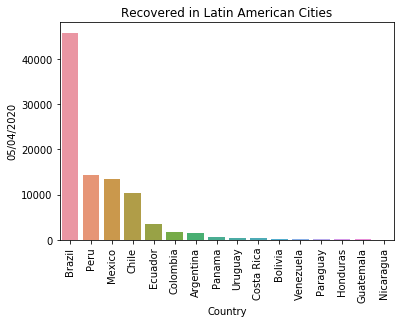

In [39]:
recovered_covid_19_latest_LA = covid_19_recovered_country_mod.iloc[[-1]].loc[:,latin_countries].sort_values(by=yesterday,ascending=False, axis=1)
recovered_transp_LA = recovered_covid_19_latest_LA.transpose()
display(recovered_covid_19_latest_LA)

ax_recovered = sns.barplot(x = recovered_transp_LA.index, y=yesterday, data=recovered_transp_LA)
plt.xticks(rotation='vertical')
plt.title(label='Recovered in Latin American Cities')

In [40]:
### We will do a country by country analysis for the yop 10 world countries in confirmed cases (we will include 
### information of the deaths and recovery in each graph) and the 5 latin american countries with most cases

top_10 = ['US', 'Spain', 'Italy', 'United Kingdom', 'France', 'Germany', 'Korea, South', 'Russia', 'China', 'Iran']#, 'Canada']

latin_america = ['Peru', 'Mexico', 'Chile', 'Ecuador', 'Colombia', 'Argentina', 'Panama', 'Uruguay',
                'Venezuela', 'Bolivia', 'Paraguay', 'Brazil']

countries_list = top_10 + latin_america

In [41]:
# Copy confirmed data frame and slice the information you want
covid_19_confirmed_last_week = covid_19_confirmed_country.copy().drop(['Lat', 'Long'], axis=1)
covid_19_confirmed_last_week_top_10 = covid_19_confirmed_last_week.loc[top_10,:]
covid_19_confirmed_last_week_latin_america = covid_19_confirmed_last_week.loc[latin_america,'03/10/2020':]

countries_ = covid_19_confirmed_last_week_top_10.index
dates = covid_19_confirmed_last_week_top_10.columns
# Melt dataframe to create line plots
covid_19_confirmed_last_week_top_10_melt = pd.melt(covid_19_confirmed_last_week_top_10.reset_index(),
                                           id_vars='Country', value_vars=dates.tolist(), 
                                           var_name='Date', value_name='Confirmed')


countries_ = covid_19_confirmed_last_week_latin_america.index
dates = covid_19_confirmed_last_week_latin_america.columns
# Melt dataframe to create line plots
covid_19_confirmed_last_week_latin_america_melt = pd.melt(covid_19_confirmed_last_week_latin_america.reset_index(),
                                           id_vars='Country', value_vars=dates.tolist(), 
                                           var_name='Date', value_name='Confirmed')

top_10_plt = px.line(covid_19_confirmed_last_week_top_10_melt, x='Date', 
                     y='Confirmed', line_group='Country', color='Country',
                    title='Confirmed cases over time in some of the most affected countries overall')


latin_america_plt = px.line(covid_19_confirmed_last_week_latin_america_melt, x='Date', 
                     y='Confirmed', line_group='Country', color='Country',
                    title='Confirmed cases over time in some latin american countries since 03/10/2020')


display(top_10_plt)
display(latin_america_plt)



In [42]:
# Copy deaths data frame and slice information you want
covid_19_deaths_last_week = covid_19_deaths_country.copy().drop(['Lat', 'Long'], axis=1)
covid_19_deaths_top_10 = covid_19_deaths_last_week.loc[top_10,:]
covid_19_deaths_latin_america = covid_19_deaths_last_week.loc[latin_america,'03/10/2020':]

countries = covid_19_deaths_top_10.index
dates = covid_19_deaths_top_10.columns
# Melt dataframe to creat line plots
covid_19_deaths_top_10_melt = pd.melt(covid_19_deaths_top_10.reset_index(), id_vars='Country',
                                        value_vars=dates.tolist(), var_name='Date', value_name='Deaths')

countries_ = covid_19_deaths_latin_america.index
dates = covid_19_deaths_latin_america.columns
# Melt dataframe to create line plots
covid_19_deaths_latin_america_melt = pd.melt(covid_19_deaths_latin_america.reset_index(),
                                           id_vars='Country', value_vars=dates.tolist(), 
                                           var_name='Date', value_name='Deaths')

top_10_deaths_plt = px.line(covid_19_deaths_top_10_melt, x='Date', 
                     y='Deaths', line_group='Country', color='Country',
                    title='Death cases over time in some of the most affected countries overall')


latin_america_deaths_plt = px.line(covid_19_deaths_latin_america_melt, x='Date', 
                     y='Deaths', line_group='Country', color='Country',
                    title='Death cases over time in some latin american countries since 03/10/2020')


display(top_10_deaths_plt)
display(latin_america_deaths_plt)


In [43]:
# Copy recovered data frame and slice information you want
covid_19_recovered_last_week = covid_19_recovered_country.copy().drop(['Lat', 'Long'], axis=1)
covid_19_recovered_top_10 = covid_19_recovered_last_week.loc[top_10,:]
covid_19_recovered_latin_america = covid_19_recovered_last_week.loc[latin_america,'03/10/2020':]

countries = covid_19_recovered_top_10.index
dates = covid_19_recovered_top_10.columns
# Melt dataframe to create line plots
covid_19_recovered_top_10_melt = pd.melt(covid_19_recovered_top_10.reset_index(), id_vars='Country',
                                        value_vars=dates.tolist(), var_name='Date', value_name='Recovered')

countries_ = covid_19_recovered_latin_america.index
dates = covid_19_recovered_latin_america.columns
# Melt dataframe to create line plots
covid_19_recovered_latin_america_melt = pd.melt(covid_19_recovered_latin_america.reset_index(),
                                           id_vars='Country', value_vars=dates.tolist(), 
                                           var_name='Date', value_name='Recovered')

top_10_recovered_plt = px.line(covid_19_recovered_top_10_melt, x='Date', 
                     y='Recovered', line_group='Country', color='Country',
                    title='Recovered cases over time in some of the most affected countries overall')


latin_america_recovered_plt = px.line(covid_19_recovered_latin_america_melt, x='Date', 
                     y='Recovered', line_group='Country', color='Country',
                    title='Recovered cases over time in some latin american countries since 03/10/2020')


display(top_10_recovered_plt)
display(latin_america_recovered_plt)



In [44]:
# Copy infectiones per day dataframe and slice information you want for a week and total
covid_19_infections_per_day_last_week = covid_19_infections_per_day_orig_country.copy().drop(['Lat', 'Long'], axis=1)
covid_19_infections_per_day_complete_sliced = covid_19_infections_per_day_last_week.loc[top_10, :]
covid_19_infections_per_day_latin_america = covid_19_infections_per_day_last_week.loc[latin_america, '03/10/2020':]

countries = covid_19_infections_per_day_complete_sliced.index
dates = covid_19_infections_per_day_complete_sliced.columns
# Melt dataframe to create line plots
covid_19_infections_per_day_complete_melt = pd.melt(covid_19_infections_per_day_complete_sliced.reset_index(), 
                                                     id_vars='Country', value_vars=dates.tolist(), 
                                                     var_name='Date', value_name='New Infections')


countries = covid_19_infections_per_day_latin_america.index
dates = covid_19_infections_per_day_latin_america.columns
covid_19_infections_per_day_latin_america_melt = pd.melt(covid_19_infections_per_day_latin_america.reset_index(), 
                                                     id_vars='Country', value_vars=dates.tolist(), 
                                                     var_name='Date', value_name='New Infections')


infections_per_day_complete_plt = px.line(covid_19_infections_per_day_complete_melt, x='Date', 
                     y='New Infections', line_group='Country', color='Country',
                    title='Per day new infections over time in some of the most affected countries overall')


infections_per_day_latin_america_plt = px.line(covid_19_infections_per_day_latin_america_melt, x='Date', 
                     y='New Infections', line_group='Country', color='Country',
                    title='Per day new infections over time in some latin american countries since 03/10/2020')


display(infections_per_day_complete_plt)
display(infections_per_day_latin_america_plt)



In [22]:
# Copy infectiones per day dataframe and slice information you want for a week and total
covid_19_infections_mv_avg = covid_19_infections_mv_avg_country.copy().drop(['Lat', 'Long'], axis=1)
covid_19_infections_mv_avg_top_10 = covid_19_infections_mv_avg.loc[top_10, :]
covid_19_infections_mv_avg_latin_america = covid_19_infections_mv_avg.loc[latin_america, '03/10/2020':]

countries = covid_19_infections_mv_avg_top_10.index
dates = covid_19_infections_mv_avg_top_10.columns
# Melt dataframe to create line plots
covid_19_infections_mv_avg_top_10_melt = pd.melt(covid_19_infections_mv_avg_top_10.reset_index(), 
                                                     id_vars='Country', value_vars=dates.tolist(), 
                                                     var_name='Date', value_name='5 day avg infections')


countries = covid_19_infections_mv_avg_latin_america.index
dates = covid_19_infections_mv_avg_latin_america.columns
covid_19_infections_mv_avg_latin_america_melt = pd.melt(covid_19_infections_mv_avg_latin_america.reset_index(), 
                                                     id_vars='Country', value_vars=dates.tolist(), 
                                                     var_name='Date', value_name='5 day avg infections')


infections_mv_avg_top_10_plt = px.line(covid_19_infections_mv_avg_top_10_melt, x='Date', 
                     y='5 day avg infections', line_group='Country', color='Country',
                    title='Per day new infections over time in some of the most affected countries overall')


infections_mv_avg_latin_america_plt = px.line(covid_19_infections_mv_avg_latin_america_melt, x='Date', 
                     y='5 day avg infections', line_group='Country', color='Country',
                    title='Per day new infections over time in some latin american countries since 03/10/2020')


display(infections_mv_avg_top_10_plt)
display(infections_mv_avg_latin_america_plt)

In [45]:
# Melt confirmed last seven days data to do line plots


#px.line(covid_19_infections_per_day_complete_melt, x='Date', y='Confirmed', line_group='Country', color='Country')

In [63]:
## Plotting world data as a heatmap

# Filtering the world data to only contain information of the country, the latitude, longitude and latest data (up to yesterday)
covid_19_confirmed_worldmap = covid_19_confirmed_orig.copy()
covid_19_deaths_worldmap = covid_19_deaths_orig.copy()
covid_19_recovered_worldmap = covid_19_recovered_orig.copy()



Country        Date  New Infections
0             Afghanistan  01/22/2020               0
1                 Albania  01/22/2020               0
2                 Algeria  01/22/2020               0
3                 Andorra  01/22/2020               0
4                  Angola  01/22/2020               0
...                   ...         ...             ...
19443  West Bank and Gaza  05/04/2020               9
19444      Western Sahara  05/04/2020               0
19445               Yemen  05/04/2020               2
19446              Zambia  05/04/2020              13
19447            Zimbabwe  05/04/2020               0

[19448 rows x 3 columns]

In [47]:
m = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2, max_zoom=10, min_zoom=2)
world = os.path.join('helper_data', 'world_map2_corrected.json')

In [48]:
# World visualizations are in logarithmic scale.

fig = px.choropleth(covid_19_confirmed_worldmap.filter(['Country', 'Lat', 'Long', yesterday], axis=1), 
                    geojson=world,
                    locations='Country', 
                    featureidkey='properties.name_sort',
                    color_continuous_scale=px.colors.sequential.YlOrBr,
                    color=np.log10(covid_19_confirmed_worldmap[yesterday] + 1))

fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()

In [49]:
fig_deaths = px.choropleth(covid_19_deaths_worldmap.filter(['Country', 'Lat', 'Long', yesterday], axis=1), 
                    geojson=world,
                    locations='Country', 
                    featureidkey='properties.name_sort',
                    color_continuous_scale=px.colors.sequential.YlOrRd,
                    color=np.log10(covid_19_deaths_worldmap[yesterday] + 1))

fig_deaths.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig_deaths.show()

In [50]:
fig_recovered = px.choropleth(covid_19_recovered_worldmap.filter(['Country', 'Lat', 'Long', yesterday], axis=1), 
                    geojson=world,
                    locations='Country', 
                    featureidkey='properties.name_sort',
                    color_continuous_scale=px.colors.sequential.YlGnBu,
                    color=np.log10(covid_19_recovered_worldmap[yesterday] + 1))
                    #animation_frame=covid_19_recovered_worldmap.columns[4:],
                    #animation_group='Country')

fig_recovered.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig_recovered.show()

In [64]:
import plotly_express as px

### Melt world datasets for animated visualization of confirmed cases (Spread) and death cases around the world.

covid_19_confirmed_worldmap_slide = covid_19_confirmed_worldmap.copy().groupby('Country').sum().drop(['Lat','Long'], axis=1).reset_index()
covid_19_confirmed_worldmap_slide = covid_19_confirmed_worldmap_slide.melt(id_vars=['Country'], value_vars=covid_19_confirmed_worldmap_slide.columns[1:], var_name = 'Date', value_name='Value')
display(covid_19_confirmed_worldmap_slide)

covid_19_deaths_worldmap_slide = covid_19_deaths_worldmap.copy().groupby('Country').sum().drop(['Lat','Long'], axis=1).reset_index()
covid_19_deaths_worldmap_slide = covid_19_deaths_worldmap_slide.melt(id_vars=['Country'], value_vars=covid_19_deaths_worldmap_slide.columns[1:], var_name = 'Date', value_name='Value')


# Filtering and melting data of new infections per day
covid_19_infections_per_day = covid_19_infections_per_day_orig_country.copy().drop(['Lat', 'Long'], axis=1)
countries = covid_19_infections_per_day.index
dates = covid_19_infections_per_day.columns

covid_19_infections_per_day_worldmap = pd.melt(covid_19_infections_per_day.reset_index(), 
                                                     id_vars='Country', value_vars=dates.tolist(), 
                                                     var_name='Date', value_name='New Infections')
display(covid_19_infections_per_day_worldmap)


Country        Date  Value
0             Afghanistan  01/22/2020      0
1                 Albania  01/22/2020      0
2                 Algeria  01/22/2020      0
3                 Andorra  01/22/2020      0
4                  Angola  01/22/2020      0
...                   ...         ...    ...
19443  West Bank and Gaza  05/04/2020    362
19444      Western Sahara  05/04/2020      6
19445               Yemen  05/04/2020     12
19446              Zambia  05/04/2020    137
19447            Zimbabwe  05/04/2020     34

[19448 rows x 3 columns]

Country        Date  New Infections
0             Afghanistan  01/22/2020               0
1                 Albania  01/22/2020               0
2                 Algeria  01/22/2020               0
3                 Andorra  01/22/2020               0
4                  Angola  01/22/2020               0
...                   ...         ...             ...
19443  West Bank and Gaza  05/04/2020               9
19444      Western Sahara  05/04/2020               0
19445               Yemen  05/04/2020               2
19446              Zambia  05/04/2020              13
19447            Zimbabwe  05/04/2020               0

[19448 rows x 3 columns]

In [52]:
fig_confirmed_slide = px.choropleth(covid_19_confirmed_worldmap_slide,
                    geojson=world,
                    locations='Country', 
                    featureidkey='properties.name_sort',
                    color_continuous_scale=px.colors.sequential.YlOrBr,
                    color=np.log10(covid_19_confirmed_worldmap_slide['Value'] + 1),
                    animation_frame='Date',
                    animation_group='Country')

fig_confirmed_slide.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig_confirmed_slide.show()

In [53]:
fig_deaths_slide = px.choropleth(covid_19_deaths_worldmap_slide,
                    geojson=world,
                    locations='Country', 
                    featureidkey='properties.name_sort',
                    color_continuous_scale=px.colors.sequential.YlOrRd,
                    color=np.log10(covid_19_deaths_worldmap_slide['Value'] + 1),
                    animation_frame='Date',
                    animation_group='Country')

fig_deaths_slide.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig_deaths_slide.show()

In [66]:
fig_infections_per_day_slide = px.choropleth(covid_19_infections_per_day_worldmap,
                    geojson=world,
                    locations='Country', 
                    featureidkey='properties.name_sort',
                    color_continuous_scale=px.colors.sequential.YlOrRd,
                    color=np.log10(covid_19_infections_per_day_worldmap['New Infections'] + 1),
                    animation_frame='Date',
                    animation_group='Country')

fig_infections_per_day_slide.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig_infections_per_day_slide.show()


#display(covid_19_infections_per_day_complete_melt)
#display(covid_19_infections_per_day_latin_america_melt)

/home/julsoles/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning:

divide by zero encountered in log10

/home/julsoles/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning:

invalid value encountered in log10



In [1]:
#### NN Model for prediction

In [ ]:
world_data_nn_model = models.